# Problem Statement
- Predict the sales price for each house 
- For each Id in the test set, you must predict the value of the SalePrice variable. 

## Lifecycle followed

    1. Data Collection
    2. Data Wrangling
    3. Model Building

### Data Collection:
Dataset can be downloaded from the link below
https://www.kaggle.com/code/mertalkan98/prediction-of-house-prices/data

### Data Wrangling:
    1. Data Profiling
    2. Missing value treatment, Filling NA values
    3. Exploratory Data Analysis
    4. Transformation

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
train=pd.read_csv("C:/Users/Arnav/Desktop/vb classes/PROJECTS/P1 (HOUSE PREDICTION)/training_set.csv")

### Data Profiling

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
train.shape #shows shape of data

(1460, 81)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- From the above info, we can say that there are some missing values in the columns

### Missing value treatment

In [7]:
train.isna().sum().iloc[0:60]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [8]:
train.isna().sum().iloc[60:81]

GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

filling the NA values

In [9]:
train["Alley"].fillna(value="noAcess", inplace=True)
train["BsmtQual"].fillna(value="noBasement", inplace=True)
train["BsmtCond"].fillna(value="noBasement", inplace=True)
train["BsmtExposure"].fillna(value="noBasement", inplace=True)
train["BsmtFinType1"].fillna(value="noBasement", inplace=True)
train["BsmtFinType2"].fillna(value="noBasement", inplace=True)
train["FireplaceQu"].fillna(value="noFireplace", inplace=True)
train["GarageType"].fillna(value="noGarage", inplace=True)
train["GarageFinish"].fillna(value="noGarage", inplace=True)
train["GarageQual"].fillna(value="noGarage", inplace=True)
train["GarageCond"].fillna(value="noGarage", inplace=True)
train["PoolQC"].fillna(value="noPool", inplace=True)
train["Fence"].fillna(value="noFence", inplace=True)
train["MiscFeature"].fillna(value="None", inplace=True)

In [10]:
cat = []
con = []

for i in train.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
        x = train[i].mode()[0]
        train[i] = train[i].fillna(x)
    else:
        con.append(i)
        x = train[i].mean()
        train[i] = train[i].fillna(x)

In [13]:
# train.isna().sum().iloc[0:60]
# train.isna().sum().iloc[60:81]

- All the missing values of the training set have been treated!

### Exploratory Data Analysis

- Visualizing the categorical features with Sales Price

### About the Features:
- MSZoning: Identifies the general zoning classification of the sale.
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property

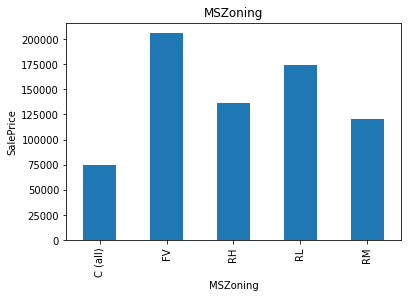

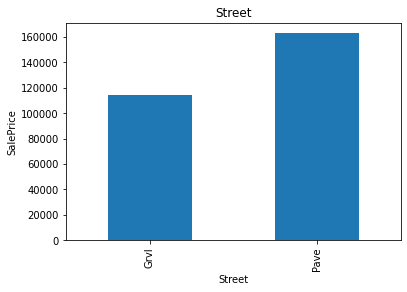

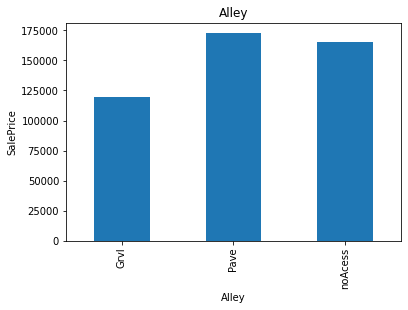

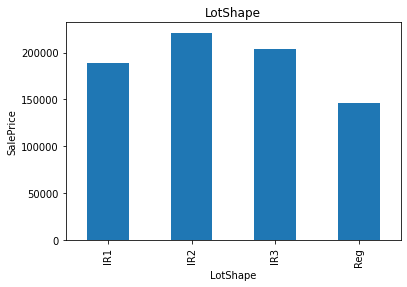

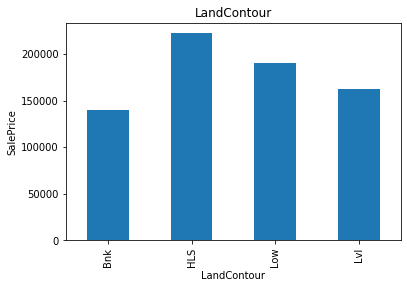

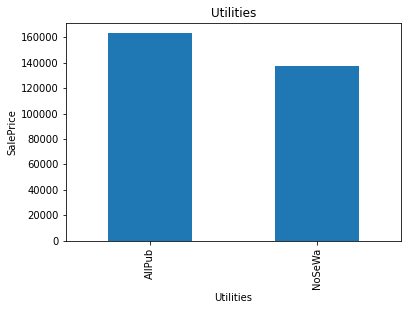

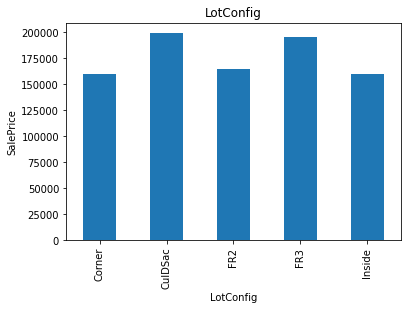

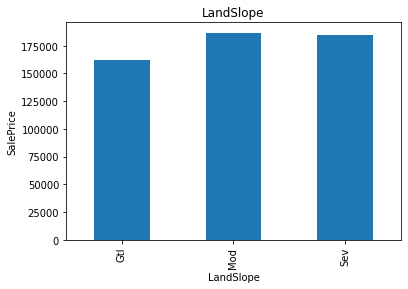

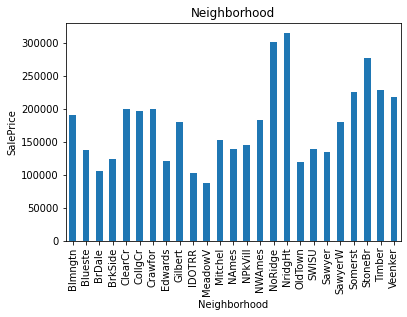

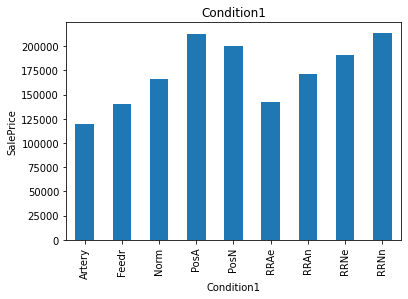

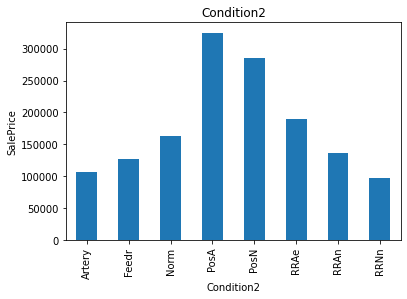

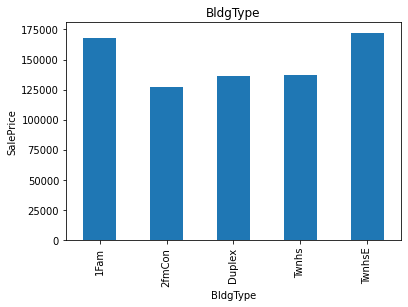

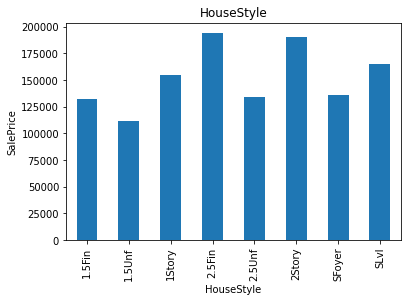

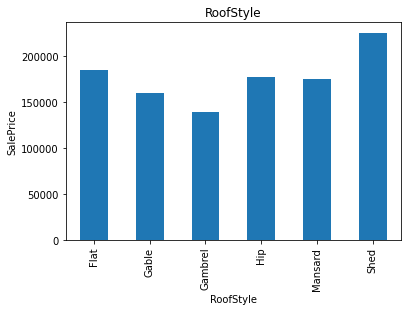

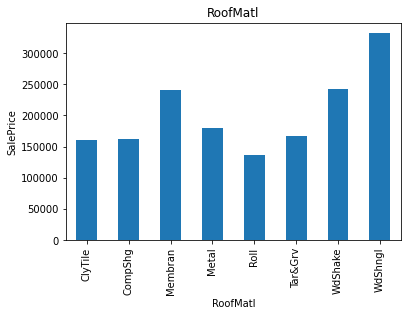

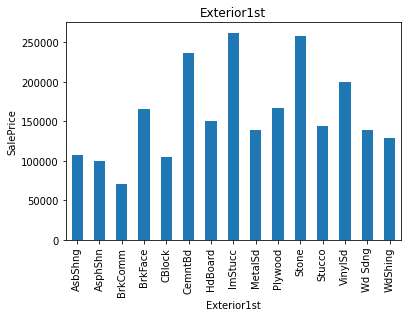

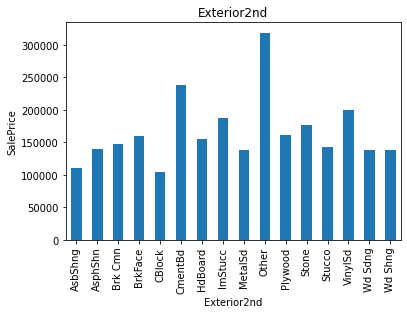

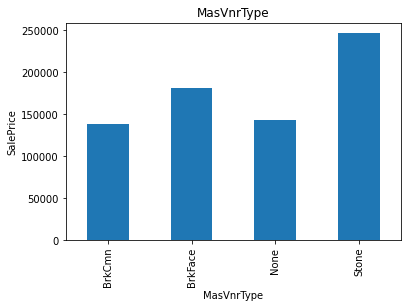

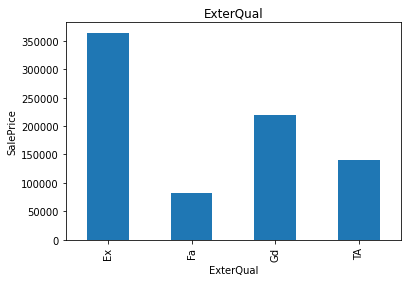

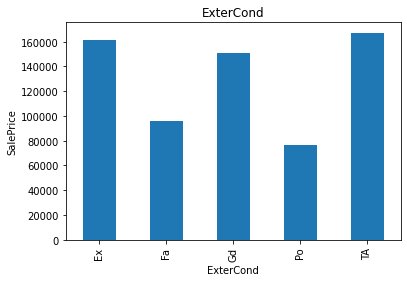

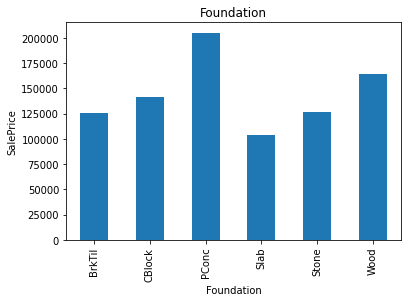

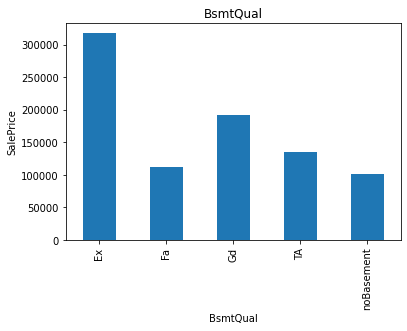

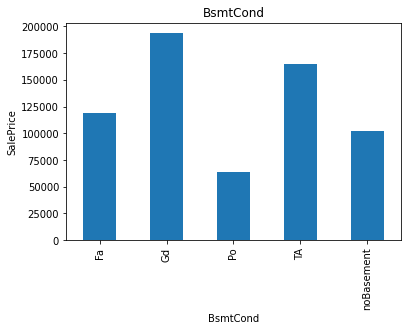

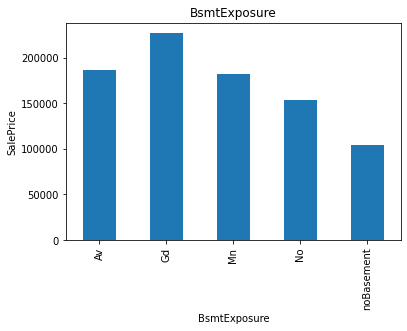

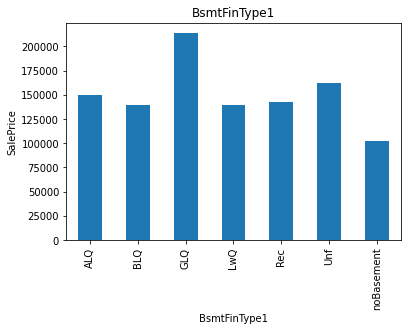

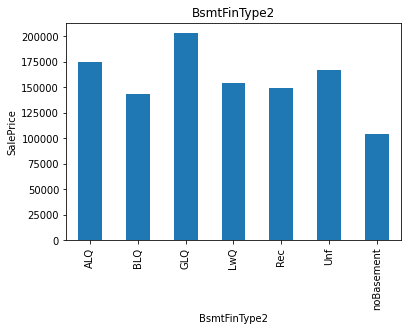

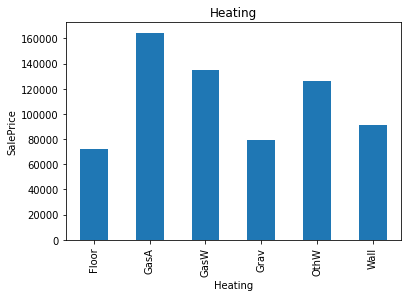

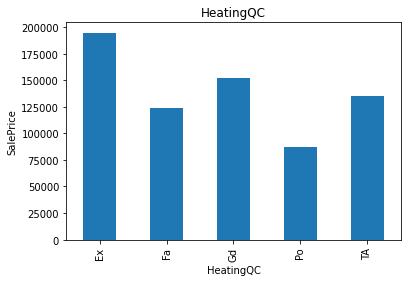

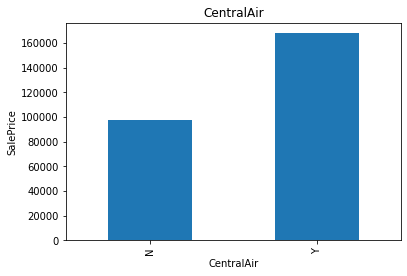

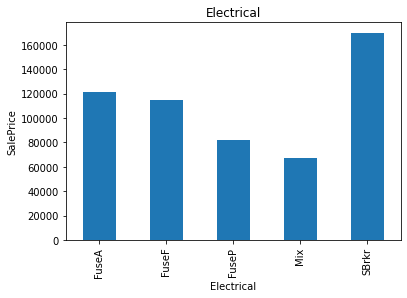

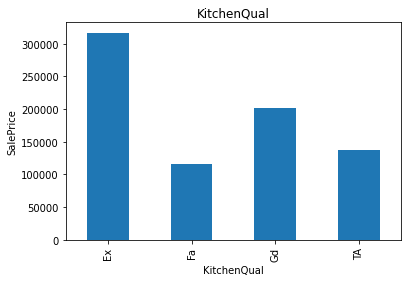

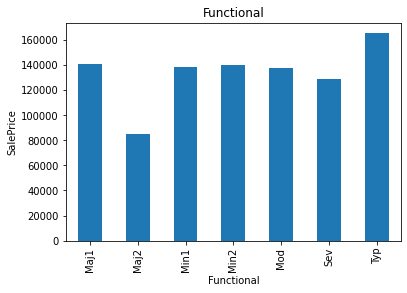

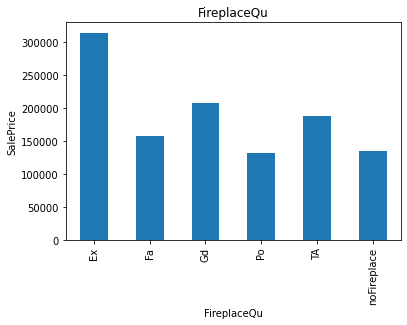

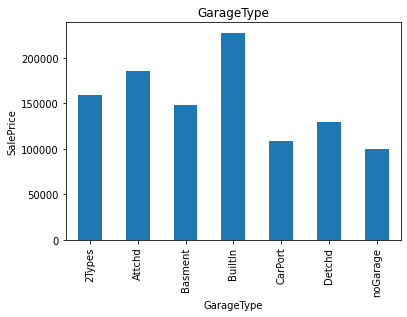

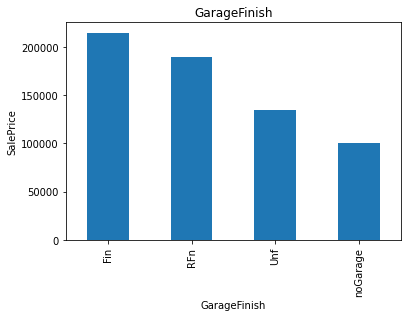

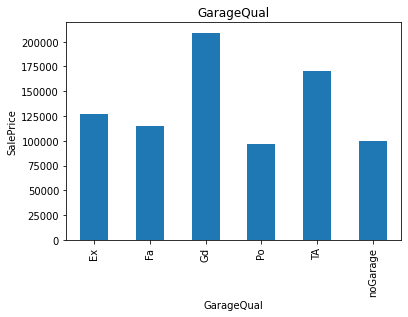

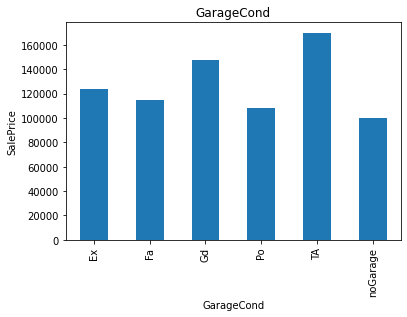

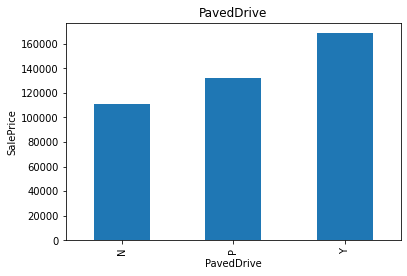

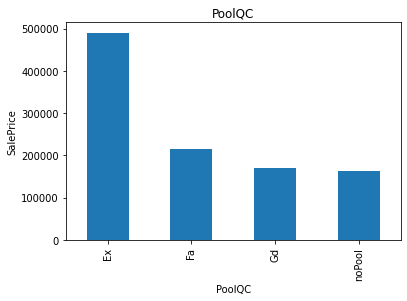

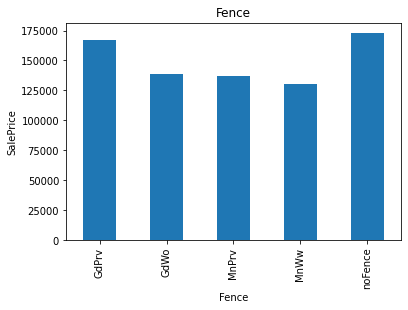

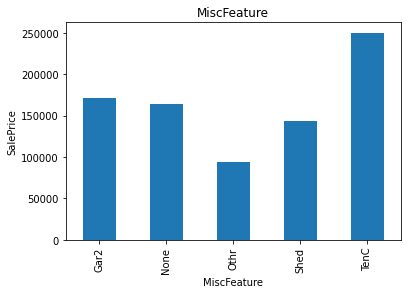

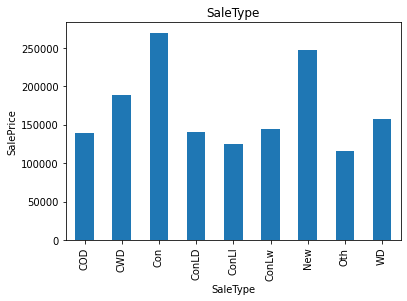

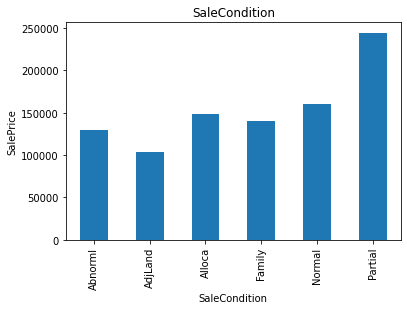

In [12]:
import matplotlib.pyplot as plt
for feature in cat:
    train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Insights Generated:
- MSZoning: FV(Floating Village Residential) is costliest 
- Street: Paved cost is high compared to gravel
- Alley: Paved and noAccess are quite similar
- LotShape: IR2 (moderately irregular) and IR3 (irregular) are costly
- Land 

In [13]:
for i in cat:
    import pandas as pd
    from statsmodels.formula.api import ols
    rel = "SalePrice ~ " + str(i)
    model = ols(rel,train).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    print(rel,"--->  ",round(anova_results.iloc[0,4],4))

SalePrice ~ MSZoning --->   0.0
SalePrice ~ Street --->   0.117
SalePrice ~ Alley --->   0.0
SalePrice ~ LotShape --->   0.0
SalePrice ~ LandContour --->   0.0
SalePrice ~ Utilities --->   0.5847
SalePrice ~ LotConfig --->   0.0
SalePrice ~ LandSlope --->   0.1414
SalePrice ~ Neighborhood --->   0.0
SalePrice ~ Condition1 --->   0.0
SalePrice ~ Condition2 --->   0.0434
SalePrice ~ BldgType --->   0.0
SalePrice ~ HouseStyle --->   0.0
SalePrice ~ RoofStyle --->   0.0
SalePrice ~ RoofMatl --->   0.0
SalePrice ~ Exterior1st --->   0.0
SalePrice ~ Exterior2nd --->   0.0
SalePrice ~ MasVnrType --->   0.0
SalePrice ~ ExterQual --->   0.0
SalePrice ~ ExterCond --->   0.0
SalePrice ~ Foundation --->   0.0
SalePrice ~ BsmtQual --->   0.0
SalePrice ~ BsmtCond --->   0.0
SalePrice ~ BsmtExposure --->   0.0
SalePrice ~ BsmtFinType1 --->   0.0
SalePrice ~ BsmtFinType2 --->   0.0
SalePrice ~ Heating --->   0.0008
SalePrice ~ HeatingQC --->   0.0
SalePrice ~ CentralAir --->   0.0
SalePrice ~ Electric

SalePrice ~ Street - 0.117 || SalePrice ~ Utilities - 0.5847 || SalePrice ~ LandSlope - 0.1414

In [14]:
cat.remove("Street")
cat.remove("Utilities")
cat.remove("LandSlope")

Checking for highest correlation

In [15]:
train.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [16]:
train.corr()["SalePrice"].sort_values().index[0:13]

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea'],
      dtype='object')

In [17]:
u = ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea']

for i in u:
    con.remove(i)

# Initialize X & Y

In [18]:
X= train.drop(labels=["Id","SalePrice"],axis=1)
Y=train[["SalePrice"]]
#full model - model with all the predictors

# removing outliers

In [19]:
con

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'SalePrice']

In [20]:
cat = []
con = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [21]:
Q = X[con].skew().sort_values()
cols_with_skew = Q[Q > 2].index

In [22]:
X[cols_with_skew].skew()

OpenPorchSF       2.364342
LotFrontage       2.384950
MasVnrArea        2.676412
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
MiscVal          24.476794
dtype: float64

In [23]:
#deal with continuous data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [24]:
out_index = []
for i in X1.columns:
    out_index.extend(list(X1[(X1[i]>3) | (X1[i]<-3)].index))
    
import numpy as np
outliers = np.unique(out_index)

X = X.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

In [25]:
X.shape

(1021, 79)

In [26]:
X1.shape

(1460, 36)

In [27]:
# X

In [28]:
X.index= range(0,1021,1)
Y.index= range(0,1021,1)

# Preprocessing

In [29]:
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])

Xnew = X1.join(X2)

In [30]:
Xnew.shape

(1021, 273)

In [31]:
Y.shape

(1021, 1)

# ---------------------------------------------------------------------------------------------------------------

# MODEL 1- OLS BACKWARD ELIMINATION MODEL

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

In [33]:
from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     51.67
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          1.45e-290
Time:                        13:13:22   Log-Likelihood:                -9031.9
No. Observations:                 816   AIC:                         1.848e+04
Df Residuals:                     606   BIC:                         1.947e+04
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     1.35e+04   2159.517      6.253      0.000    9262.373    1.77e+04
MSSubClass              -3420.3603   7974.431     -0.429      0.668   -1.91e+04    1.22e+04
LotFrontage              -197.9492   1129.509     -0.175      0.861   -2416.176    2020.277
LotArea                  5280.3016   1232.706      4.284      0.000    2859.407    7701.196
OverallQual              6995.1341   1604.361      4.360      0.000    3844.352    1.01e+04
OverallCond              5955.5387   1059.099      5.623      0.000    3875.588    8035.490
YearBuilt                1.177e+04   3064.593      3.840      0.000    5749.973    1.78e+04
YearRemodAdd             3108.7546   1445.582      2.151      0.032     269.795    5947.714
MasVnrArea               -311.3899   1263.794     -0.246      0.805   -2793.338    2170.558
BsmtFinSF1               6408.9830   1142.773      5.608      0.000    4164.706    8653.260
BsmtFinSF2               1253.7634   1530.964      0.819      0.413   -1752.876    4260.402
BsmtUnfSF                 432.3341   1047.700      0.413      0.680   -1625.230    2489.898
TotalBsmtSF              7886.1536   1799.385      4.383      0.000    4352.366    1.14e+04
1stFlrSF                 3902.5781   1883.075      2.072      0.039     204.432    7600.724
2ndFlrSF                 1.292e+04   1950.647      6.621      0.000    9085.067    1.67e+04
LowQualFinSF             -100.8441    652.694     -0.155      0.877   -1382.662    1180.973
GrLivArea                1.509e+04   1511.473      9.982      0.000    1.21e+04    1.81e+04
BsmtFullBath              -18.9407   1132.793     -0.017      0.987   -2243.618    2205.737
BsmtHalfBath              7.25e-11   5.22e-11      1.389      0.165      -3e-11    1.75e-10
FullBath                  -58.9665   1482.963     -0.040      0.968   -2971.336    2853.403
HalfBath                  140.2080   1249.789      0.112      0.911   -2314.235    2594.651
BedroomAbvGr            -1117.9425   1253.257     -0.892      0.373   -3579.197    1343.312
KitchenAbvGr             1.498e-10   7.75e-11      1.934      0.054   -2.32e-12    3.02e-10
TotRmsAbvGrd              778.0397   1640.042      0.474      0.635   -2442.817    3998.896
Fireplaces                 54.9417   2020.040      0.027      0.978   -3912.187    4022.070
GarageYrBlt             -1385.0267   1927.347     -0.719      0.473   -5170.118    2400.065
GarageCars               2806.4883   1884.277      1.489      0.137    -894.018    6506.994
GarageArea               4068.4423   1836.484      2.215      0.027     461.796    7675.089
WoodDeckSF               3343.4374    802.626      4.166      0.000    1767.171    4919.704
OpenPorchSF              1897.1438    858.444      2.210      0.027     211.257    3583.031
EnclosedPorch             448.4797    872.476  

# MODEL-1

In [34]:
round(model.rsquared_adj,4)

0.9285

In [35]:
model.pvalues.sort_values()#highest pvalue will be the last one

GrLivArea               7.939679e-22
Neighborhood_StoneBr    2.257375e-12
2ndFlrSF                7.852532e-11
PoolQC_noPool           7.604419e-10
Utilities_AllPub        7.604419e-10
                            ...     
Fireplaces              9.783105e-01
BsmtFullBath            9.866652e-01
KitchenQual_TA          9.868612e-01
GarageCond_Gd           9.961954e-01
GarageQual_Po                    NaN
Length: 274, dtype: float64

In [36]:
model.pvalues.sort_values().index

Index(['GrLivArea', 'Neighborhood_StoneBr', '2ndFlrSF', 'PoolQC_noPool',
       'Utilities_AllPub', 'const', 'BsmtExposure_Gd', 'OverallCond',
       'BsmtFinSF1', 'KitchenQual_Ex',
       ...
       'Functional_Min1', 'Exterior2nd_Brk Cmn', 'RoofStyle_Hip', 'MiscVal',
       'Exterior1st_WdShing', 'Fireplaces', 'BsmtFullBath', 'KitchenQual_TA',
       'GarageCond_Gd', 'GarageQual_Po'],
      dtype='object', length=274)

In [37]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]

In [38]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=columns_to_be_dropped,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    columns_to_be_dropped =model.pvalues.sort_values().index[-1]
    print(columns_to_be_dropped)

0.9285
GarageCond_Gd
0.9285
KitchenQual_TA
0.9285
BsmtFullBath
0.9287
Exterior1st_WdShing
0.9287
Fireplaces
0.9288
MiscVal
0.9289
Exterior2nd_Brk Cmn
0.9289
RoofStyle_Hip


# rsquare value decreases from 
    LotShape_IR3
    0.9365

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error,mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,pred_tr),2)
ts_err = round(mean_absolute_error(ytest,pred_ts),2)

In [40]:
print("The training error for the OLS Backward Elimination Model: ",tr_err )

The training error for the OLS Backward Elimination Model:  10499.92


In [41]:
print("The testing error for the OLS Backward Elimination Model: ",ts_err )

The testing error for the OLS Backward Elimination Model:  4911944678725.88


error difference= 2,828.06

# Ridge & Lasso

In [42]:
tr= []
ts= []

In [43]:
w=[]
q=0.01
for i in range(0,1000,1):
    q=q+0.01
    q=round(q,2)
    w.append(q)

In [44]:
for i in w:
    from sklearn.linear_model import Ridge
    from sklearn.metrics import mean_absolute_error
    rr=Ridge(alpha=i)
    model=rr.fit(xtrain,ytrain)

    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)
    
    tr.append(tr_err)
    ts.append(ts_err)

#     print("=================",i,"================")
#     print("The training error(Ridge) is: ",training_error)
#     print("The testing error(Ridge) is: ",testing_error,"\n")

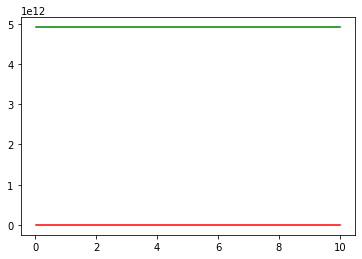

In [45]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")

In [46]:
    from sklearn.linear_model import Ridge
    rr=Ridge(alpha=10.01)
    model=rr.fit(xtrain,ytrain)

    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)

    print("=================","================")
    print("The training error(Ridge) is: ",training_error)
    print("The testing error(Ridge) is: ",testing_error,"\n")

================= ================
The training error(Ridge) is:  11287.95
The testing error(Ridge) is:  12214.88 



# difference between the training and testing error = 1,172.83

In [47]:
tr = []
ts = []

In [48]:
w=[]
q=0.01
for i in range(0,1000,1):
    q=q+0.01
    q=round(q,2)
    w.append(q)

In [49]:
for i in w:
    from sklearn.linear_model import Lasso
    ls=Lasso(alpha=i)
    model=ls.fit(xtrain,ytrain)
    from sklearn.metrics import mean_absolute_error
    
    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)
    
    tr.append(tr_err)
    ts.append(ts_err)

#     print("=================",i,"================")
#     print("The training error(Lasso) is: ",training_error)
#     print("The testing error(Lasso) is: ",testing_error,"\n")

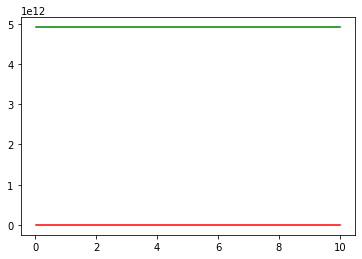

In [50]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")

In [51]:
    from sklearn.linear_model import Lasso
    ls=Lasso(alpha=10.01)
    model=ls.fit(xtrain,ytrain)
        
    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)

    print("=================","================")
    print("The training error(Lasso) is: ",training_error)
    print("The testing error(Lasso) is: ",testing_error,"\n")

================= ================
The training error(Lasso) is:  10673.39
The testing error(Lasso) is:  12812.22 



# difference between the training and testing error = 2,446.63

# -------------------------------------------------------------------------------------------------------------

# The best OLS Backward Elemination Model score - 0.9366

 error difference = 1,172.83

# Training error is very less than Testing error 
    There is no Overfitting.
    The Model is ACCEPTED!

# -------------------------------------------------------------------------------------------------------------

# MODEL 2 - GridSearchCV MODEL 

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

In [53]:
from sklearn.linear_model import Ridge
rr= Ridge()

In [54]:
q=0.01
w=[]
for i in range(0,300):
    w.append(q)
    q=q+0.01

In [55]:
from sklearn.model_selection import GridSearchCV

tuning_grid= {"alpha":w}
cv=GridSearchCV(rr,tuning_grid,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 2.99999999999998}

In [56]:
from sklearn.metrics import mean_absolute_error

In [57]:
    from sklearn.linear_model import Ridge
    rr=Ridge(alpha=2.99999999999998)
    model=rr.fit(xtrain,ytrain)

    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)

    print("=================","================")
    print("The training error(Ridge) is: ",training_error)
    print("The testing error(Ridge) is: ",testing_error,"\n")

================= ================
The training error(Ridge) is:  10861.32
The testing error(Ridge) is:  12249.12 



Ridge error difference = 1269.72

In [58]:
    from sklearn.linear_model import Lasso
    rr=Lasso(alpha=2.99999999999998)
    model=rr.fit(xtrain,ytrain)

    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)

    print("=================","================")
    print("The training error(Ridge) is: ",training_error)
    print("The testing error(Ridge) is: ",testing_error,"\n")

================= ================
The training error(Ridge) is:  10538.43
The testing error(Ridge) is:  13143.02 



Lasso error difference = 2426.88

# ---------------------------------------------------------------------------------------------------------------

# MODEL 3 - FORWARD SELECTION MODEL

In [59]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,noAcess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,noFireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,noPool,noFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,noAcess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,noPool,noFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,noAcess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,noPool,noFence,None,0,9,2008,WD,Normal,223500


In [60]:
train.shape

(1460, 81)

In [61]:
train.corr()[["SalePrice"]].sort_values(by="SalePrice")

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


In [62]:
#dropping unwanted columns
X= train.drop(labels=["Id","SalePrice"],axis=1)
Y=train[["SalePrice"]]
#full model - model with all the predictors
X=train[["OverallQual"]]

cat=[]
con=[]
for i in X.columns:
    if(train[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

#Standardize
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con) #standized values

#divide data into training and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=31)

#create model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model2=lm.fit(xtrain,ytrain)
pred=model2.predict(xtest)

#adjusted r square
from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),4)

#full model created (has relevant and not relevant features)

0.6225

In [63]:
#dropping unwanted columns
# X= train.drop(labels=["Id","SalePrice"],axis=1)
Y=train[["SalePrice"]]
#full model - model with all the predictors
X=train[["OverallQual","GrLivArea"]]

cat=[]
con=[]
for i in X.columns:
    if(train[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

#Standardize
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con) #standized values

#divide data into training and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=31)

#create model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model2=lm.fit(xtrain,ytrain)
pred=model2.predict(xtest)

#adjusted r square
from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),4)

#full model created (has relevant and not relevant features)

0.7112

In [64]:
#dropping unwanted columns
# X= train.drop(labels=["Id","SalePrice"],axis=1)
Y=train[["SalePrice"]]
#full model - model with all the predictors
X=train[["OverallQual","GrLivArea","GarageCars"]]

cat=[]
con=[]
for i in X.columns:
    if(train[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

#Standardize
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con) #standized values

#divide data into training and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=31)

#create model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model2=lm.fit(xtrain,ytrain)
pred=model2.predict(xtest)

#adjusted r square
from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),4)

#full model created (has relevant and not relevant features)

0.7316

In [65]:
#dropping unwanted columns
# X= train.drop(labels=["Id","SalePrice"],axis=1)
Y=train[["SalePrice"]]
#full model - model with all the predictors
X=train[["OverallQual","GrLivArea","GarageCars","GarageArea"]]

cat=[]
con=[]
for i in X.columns:
    if(train[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

#Standardize
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con) #standized values

#divide data into training and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=31)

#create model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model2=lm.fit(xtrain,ytrain)
pred=model2.predict(xtest)

#adjusted r square
from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),4)

#full model created (has relevant and not relevant features)

0.7343

In [66]:
#dropping unwanted columns
# X= train.drop(labels=["Id","SalePrice"],axis=1)
Y=train[["SalePrice"]]
#full model - model with all the predictors
X=train[["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF"]]

cat=[]
con=[]
for i in X.columns:
    if(train[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

#Standardize
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con) #standized values

#divide data into training and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=31)

#create model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model2=lm.fit(xtrain,ytrain)
pred=model2.predict(xtest)

#adjusted r square
from sklearn.metrics import explained_variance_score
round(explained_variance_score(ytest,pred),4)

#full model created (has relevant and not relevant features)

0.7464

# The adjusted rsquare decreases from here

In [67]:
# #dropping unwanted columns
# # X= train.drop(labels=["Id","SalePrice"],axis=1)
# Y=train[["SalePrice"]]
# #full model - model with all the predictors
# X=train[["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]]

# cat=[]
# con=[]
# for i in X.columns:
#     if(train[i].dtypes=="object"):
#         cat.append(i)
#     else:
#         con.append(i)

# #Standardize
# from sklearn.preprocessing import StandardScaler
# ss= StandardScaler()
# X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con) #standized values

# #divide data into training and testing set
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=31)

# #create model
# from sklearn.linear_model import LinearRegression
# lm=LinearRegression()
# model2=lm.fit(xtrain,ytrain)
# pred=model2.predict(xtest)

# #adjusted r square
# from sklearn.metrics import explained_variance_score
# round(explained_variance_score(ytest,pred),4)

# #full model created (has relevant and not relevant features)

In [68]:
lm= LinearRegression()
model2= lm.fit(xtrain,ytrain)
from sklearn.metrics import mean_absolute_error

pred_training= model2.predict(xtrain)
pred_testing = model2.predict(xtest)
training_error= round(mean_absolute_error(ytrain,pred_training),2)#training error
testing_error = round(mean_absolute_error(ytest,pred_testing),2)#testing error

print("The training error for the Forward Selection Model: ",training_error)
print("The testing error for the Forward Selection Model: ",testing_error)

The training error for the Forward Selection Model:  24757.33
The testing error for the Forward Selection Model:  26109.19


error difference= 1351.86

# Ridge & Lasso

In [69]:
w=[]
q=0.01
for i in range(0,1000,1):
    q=q+0.01
    q=round(q,2)
    w.append(q)

In [70]:
for i in w:
    from sklearn.linear_model import Ridge
    rr=Ridge(alpha=i)
    model2=rr.fit(xtrain,ytrain)

    pred_training= model2.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model2.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)

    print("=================",i,"================")
    print("The training error(Ridge) is: ",training_error)
    print("The testing error(Ridge) is: ",testing_error,"\n")

================= 0.02 ================
The training error(Ridge) is:  24757.22
The testing error(Ridge) is:  26109.09 

================= 0.03 ================
The training error(Ridge) is:  24757.17
The testing error(Ridge) is:  26109.04 

================= 0.04 ================
The training error(Ridge) is:  24757.11
The testing error(Ridge) is:  26108.99 

================= 0.05 ================
The training error(Ridge) is:  24757.06
The testing error(Ridge) is:  26108.95 

================= 0.06 ================
The training error(Ridge) is:  24757.01
The testing error(Ridge) is:  26108.9 

================= 0.07 ================
The training error(Ridge) is:  24756.95
The testing error(Ridge) is:  26108.85 

================= 0.08 ================
The training error(Ridge) is:  24756.9
The testing error(Ridge) is:  26108.8 

================= 0.09 ================
The training error(Ridge) is:  24756.85
The testing error(Ridge) is:  26108.75 

================= 0.1 =============

================= 0.93 ================
The training error(Ridge) is:  24752.37
The testing error(Ridge) is:  26104.72 

================= 0.94 ================
The training error(Ridge) is:  24752.32
The testing error(Ridge) is:  26104.67 

================= 0.95 ================
The training error(Ridge) is:  24752.26
The testing error(Ridge) is:  26104.62 

================= 0.96 ================
The training error(Ridge) is:  24752.21
The testing error(Ridge) is:  26104.57 

================= 0.97 ================
The training error(Ridge) is:  24752.16
The testing error(Ridge) is:  26104.52 

================= 0.98 ================
The training error(Ridge) is:  24752.1
The testing error(Ridge) is:  26104.48 

================= 0.99 ================
The training error(Ridge) is:  24752.05
The testing error(Ridge) is:  26104.43 

================= 1.0 ================
The training error(Ridge) is:  24752.0
The testing error(Ridge) is:  26104.38 

================= 1.01 ============

================= 1.8 ================
The training error(Ridge) is:  24747.77
The testing error(Ridge) is:  26100.55 

================= 1.81 ================
The training error(Ridge) is:  24747.71
The testing error(Ridge) is:  26100.5 

================= 1.82 ================
The training error(Ridge) is:  24747.66
The testing error(Ridge) is:  26100.45 

================= 1.83 ================
The training error(Ridge) is:  24747.61
The testing error(Ridge) is:  26100.41 

================= 1.84 ================
The training error(Ridge) is:  24747.55
The testing error(Ridge) is:  26100.36 

================= 1.85 ================
The training error(Ridge) is:  24747.5
The testing error(Ridge) is:  26100.31 

================= 1.86 ================
The training error(Ridge) is:  24747.45
The testing error(Ridge) is:  26100.26 

================= 1.87 ================
The training error(Ridge) is:  24747.4
The testing error(Ridge) is:  26100.21 

================= 1.88 =============

================= 2.67 ================
The training error(Ridge) is:  24743.18
The testing error(Ridge) is:  26096.4 

================= 2.68 ================
The training error(Ridge) is:  24743.13
The testing error(Ridge) is:  26096.35 

================= 2.69 ================
The training error(Ridge) is:  24743.08
The testing error(Ridge) is:  26096.3 

================= 2.7 ================
The training error(Ridge) is:  24743.03
The testing error(Ridge) is:  26096.25 

================= 2.71 ================
The training error(Ridge) is:  24742.97
The testing error(Ridge) is:  26096.21 

================= 2.72 ================
The training error(Ridge) is:  24742.92
The testing error(Ridge) is:  26096.16 

================= 2.73 ================
The training error(Ridge) is:  24742.87
The testing error(Ridge) is:  26096.11 

================= 2.74 ================
The training error(Ridge) is:  24742.82
The testing error(Ridge) is:  26096.06 

================= 2.75 ============

================= 3.58 ================
The training error(Ridge) is:  24738.41
The testing error(Ridge) is:  26092.07 

================= 3.59 ================
The training error(Ridge) is:  24738.36
The testing error(Ridge) is:  26092.02 

================= 3.6 ================
The training error(Ridge) is:  24738.31
The testing error(Ridge) is:  26091.98 

================= 3.61 ================
The training error(Ridge) is:  24738.26
The testing error(Ridge) is:  26091.93 

================= 3.62 ================
The training error(Ridge) is:  24738.2
The testing error(Ridge) is:  26091.88 

================= 3.63 ================
The training error(Ridge) is:  24738.15
The testing error(Ridge) is:  26091.83 

================= 3.64 ================
The training error(Ridge) is:  24738.1
The testing error(Ridge) is:  26091.79 

================= 3.65 ================
The training error(Ridge) is:  24738.05
The testing error(Ridge) is:  26091.74 

================= 3.66 ============

================= 4.53 ================
The training error(Ridge) is:  24733.59
The testing error(Ridge) is:  26087.57 

================= 4.54 ================
The training error(Ridge) is:  24733.54
The testing error(Ridge) is:  26087.53 

================= 4.55 ================
The training error(Ridge) is:  24733.49
The testing error(Ridge) is:  26087.48 

================= 4.56 ================
The training error(Ridge) is:  24733.44
The testing error(Ridge) is:  26087.43 

================= 4.57 ================
The training error(Ridge) is:  24733.39
The testing error(Ridge) is:  26087.38 

================= 4.58 ================
The training error(Ridge) is:  24733.34
The testing error(Ridge) is:  26087.34 

================= 4.59 ================
The training error(Ridge) is:  24733.29
The testing error(Ridge) is:  26087.29 

================= 4.6 ================
The training error(Ridge) is:  24733.24
The testing error(Ridge) is:  26087.24 

================= 4.61 ==========

================= 5.35 ================
The training error(Ridge) is:  24729.48
The testing error(Ridge) is:  26083.7 

================= 5.36 ================
The training error(Ridge) is:  24729.43
The testing error(Ridge) is:  26083.66 

================= 5.37 ================
The training error(Ridge) is:  24729.38
The testing error(Ridge) is:  26083.61 

================= 5.38 ================
The training error(Ridge) is:  24729.33
The testing error(Ridge) is:  26083.56 

================= 5.39 ================
The training error(Ridge) is:  24729.28
The testing error(Ridge) is:  26083.52 

================= 5.4 ================
The training error(Ridge) is:  24729.23
The testing error(Ridge) is:  26083.47 

================= 5.41 ================
The training error(Ridge) is:  24729.18
The testing error(Ridge) is:  26083.42 

================= 5.42 ================
The training error(Ridge) is:  24729.13
The testing error(Ridge) is:  26083.38 

================= 5.43 ===========

================= 6.31 ================
The training error(Ridge) is:  24724.69
The testing error(Ridge) is:  26079.19 

================= 6.32 ================
The training error(Ridge) is:  24724.64
The testing error(Ridge) is:  26079.15 

================= 6.33 ================
The training error(Ridge) is:  24724.59
The testing error(Ridge) is:  26079.1 

================= 6.34 ================
The training error(Ridge) is:  24724.54
The testing error(Ridge) is:  26079.05 

================= 6.35 ================
The training error(Ridge) is:  24724.49
The testing error(Ridge) is:  26079.0 

================= 6.36 ================
The training error(Ridge) is:  24724.44
The testing error(Ridge) is:  26078.96 

================= 6.37 ================
The training error(Ridge) is:  24724.39
The testing error(Ridge) is:  26078.91 

================= 6.38 ================
The training error(Ridge) is:  24724.34
The testing error(Ridge) is:  26078.86 

================= 6.39 ===========

================= 7.2 ================
The training error(Ridge) is:  24720.27
The testing error(Ridge) is:  26075.02 

================= 7.21 ================
The training error(Ridge) is:  24720.22
The testing error(Ridge) is:  26074.98 

================= 7.22 ================
The training error(Ridge) is:  24720.17
The testing error(Ridge) is:  26074.93 

================= 7.23 ================
The training error(Ridge) is:  24720.12
The testing error(Ridge) is:  26074.88 

================= 7.24 ================
The training error(Ridge) is:  24720.08
The testing error(Ridge) is:  26074.84 

================= 7.25 ================
The training error(Ridge) is:  24720.03
The testing error(Ridge) is:  26074.79 

================= 7.26 ================
The training error(Ridge) is:  24719.98
The testing error(Ridge) is:  26074.74 

================= 7.27 ================
The training error(Ridge) is:  24719.93
The testing error(Ridge) is:  26074.7 

================= 7.28 ===========

================= 7.91 ================
The training error(Ridge) is:  24716.76
The testing error(Ridge) is:  26071.71 

================= 7.92 ================
The training error(Ridge) is:  24716.71
The testing error(Ridge) is:  26071.66 

================= 7.93 ================
The training error(Ridge) is:  24716.66
The testing error(Ridge) is:  26071.62 

================= 7.94 ================
The training error(Ridge) is:  24716.61
The testing error(Ridge) is:  26071.57 

================= 7.95 ================
The training error(Ridge) is:  24716.56
The testing error(Ridge) is:  26071.52 

================= 7.96 ================
The training error(Ridge) is:  24716.52
The testing error(Ridge) is:  26071.48 

================= 7.97 ================
The training error(Ridge) is:  24716.47
The testing error(Ridge) is:  26071.43 

================= 7.98 ================
The training error(Ridge) is:  24716.42
The testing error(Ridge) is:  26071.38 

================= 7.99 =========

================= 8.75 ================
The training error(Ridge) is:  24712.64
The testing error(Ridge) is:  26067.8 

================= 8.76 ================
The training error(Ridge) is:  24712.59
The testing error(Ridge) is:  26067.75 

================= 8.77 ================
The training error(Ridge) is:  24712.54
The testing error(Ridge) is:  26067.71 

================= 8.78 ================
The training error(Ridge) is:  24712.49
The testing error(Ridge) is:  26067.66 

================= 8.79 ================
The training error(Ridge) is:  24712.44
The testing error(Ridge) is:  26067.61 

================= 8.8 ================
The training error(Ridge) is:  24712.39
The testing error(Ridge) is:  26067.57 

================= 8.81 ================
The training error(Ridge) is:  24712.34
The testing error(Ridge) is:  26067.52 

================= 8.82 ================
The training error(Ridge) is:  24712.3
The testing error(Ridge) is:  26067.47 

================= 8.83 ============

================= 9.66 ================
The training error(Ridge) is:  24708.2
The testing error(Ridge) is:  26063.58 

================= 9.67 ================
The training error(Ridge) is:  24708.15
The testing error(Ridge) is:  26063.53 

================= 9.68 ================
The training error(Ridge) is:  24708.1
The testing error(Ridge) is:  26063.49 

================= 9.69 ================
The training error(Ridge) is:  24708.05
The testing error(Ridge) is:  26063.44 

================= 9.7 ================
The training error(Ridge) is:  24708.01
The testing error(Ridge) is:  26063.39 

================= 9.71 ================
The training error(Ridge) is:  24707.96
The testing error(Ridge) is:  26063.35 

================= 9.72 ================
The training error(Ridge) is:  24707.91
The testing error(Ridge) is:  26063.3 

================= 9.73 ================
The training error(Ridge) is:  24707.86
The testing error(Ridge) is:  26063.26 

================= 9.74 =============

In [71]:
    from sklearn.linear_model import Ridge
    rr=Ridge(alpha=10.01)
    model3=rr.fit(xtrain,ytrain)

    pred_training= model3.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model3.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)

    print("=================","================")
    print("The training error(Ridge) is: ",training_error)
    print("The testing error(Ridge) is: ",testing_error,"\n")

================= ================
The training error(Ridge) is:  24706.5
The testing error(Ridge) is:  26061.96 



In [72]:
for i in w:
    from sklearn.linear_model import Lasso
    ls=Lasso(alpha=i)
    model2=ls.fit(xtrain,ytrain)
        
    pred_training= model2.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model2.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)

    print("=================",i,"================")
    print("The training error(Lasso) is: ",training_error)
    print("The testing error(Lasso) is: ",testing_error,"\n")

================= 0.02 ================
The training error(Lasso) is:  24757.33
The testing error(Lasso) is:  26109.18 

================= 0.03 ================
The training error(Lasso) is:  24757.33
The testing error(Lasso) is:  26109.18 

================= 0.04 ================
The training error(Lasso) is:  24757.32
The testing error(Lasso) is:  26109.18 

================= 0.05 ================
The training error(Lasso) is:  24757.32
The testing error(Lasso) is:  26109.18 

================= 0.06 ================
The training error(Lasso) is:  24757.32
The testing error(Lasso) is:  26109.18 

================= 0.07 ================
The training error(Lasso) is:  24757.32
The testing error(Lasso) is:  26109.17 

================= 0.08 ================
The training error(Lasso) is:  24757.32
The testing error(Lasso) is:  26109.17 

================= 0.09 ================
The training error(Lasso) is:  24757.32
The testing error(Lasso) is:  26109.17 

================= 0.1 ==========

================= 0.97 ================
The training error(Lasso) is:  24757.2
The testing error(Lasso) is:  26109.03 

================= 0.98 ================
The training error(Lasso) is:  24757.2
The testing error(Lasso) is:  26109.03 

================= 0.99 ================
The training error(Lasso) is:  24757.2
The testing error(Lasso) is:  26109.03 

================= 1.0 ================
The training error(Lasso) is:  24757.2
The testing error(Lasso) is:  26109.02 

================= 1.01 ================
The training error(Lasso) is:  24757.2
The testing error(Lasso) is:  26109.02 

================= 1.02 ================
The training error(Lasso) is:  24757.2
The testing error(Lasso) is:  26109.02 

================= 1.03 ================
The training error(Lasso) is:  24757.2
The testing error(Lasso) is:  26109.02 

================= 1.04 ================
The training error(Lasso) is:  24757.2
The testing error(Lasso) is:  26109.02 

================= 1.05 ================
T

================= 1.72 ================
The training error(Lasso) is:  24757.11
The testing error(Lasso) is:  26108.91 

================= 1.73 ================
The training error(Lasso) is:  24757.11
The testing error(Lasso) is:  26108.91 

================= 1.74 ================
The training error(Lasso) is:  24757.11
The testing error(Lasso) is:  26108.9 

================= 1.75 ================
The training error(Lasso) is:  24757.11
The testing error(Lasso) is:  26108.9 

================= 1.76 ================
The training error(Lasso) is:  24757.1
The testing error(Lasso) is:  26108.9 

================= 1.77 ================
The training error(Lasso) is:  24757.1
The testing error(Lasso) is:  26108.9 

================= 1.78 ================
The training error(Lasso) is:  24757.1
The testing error(Lasso) is:  26108.9 

================= 1.79 ================
The training error(Lasso) is:  24757.1
The testing error(Lasso) is:  26108.89 

================= 1.8 ================
Th

================= 2.65 ================
The training error(Lasso) is:  24756.99
The testing error(Lasso) is:  26108.76 

================= 2.66 ================
The training error(Lasso) is:  24756.99
The testing error(Lasso) is:  26108.75 

================= 2.67 ================
The training error(Lasso) is:  24756.99
The testing error(Lasso) is:  26108.75 

================= 2.68 ================
The training error(Lasso) is:  24756.99
The testing error(Lasso) is:  26108.75 

================= 2.69 ================
The training error(Lasso) is:  24756.98
The testing error(Lasso) is:  26108.75 

================= 2.7 ================
The training error(Lasso) is:  24756.98
The testing error(Lasso) is:  26108.75 

================= 2.71 ================
The training error(Lasso) is:  24756.98
The testing error(Lasso) is:  26108.75 

================= 2.72 ================
The training error(Lasso) is:  24756.98
The testing error(Lasso) is:  26108.74 

================= 2.73 ==========

================= 3.33 ================
The training error(Lasso) is:  24756.9
The testing error(Lasso) is:  26108.64 

================= 3.34 ================
The training error(Lasso) is:  24756.9
The testing error(Lasso) is:  26108.64 

================= 3.35 ================
The training error(Lasso) is:  24756.9
The testing error(Lasso) is:  26108.64 

================= 3.36 ================
The training error(Lasso) is:  24756.9
The testing error(Lasso) is:  26108.64 

================= 3.37 ================
The training error(Lasso) is:  24756.9
The testing error(Lasso) is:  26108.64 

================= 3.38 ================
The training error(Lasso) is:  24756.9
The testing error(Lasso) is:  26108.64 

================= 3.39 ================
The training error(Lasso) is:  24756.89
The testing error(Lasso) is:  26108.63 

================= 3.4 ================
The training error(Lasso) is:  24756.89
The testing error(Lasso) is:  26108.63 

================= 3.41 ================

================= 4.09 ================
The training error(Lasso) is:  24756.8
The testing error(Lasso) is:  26108.52 

================= 4.1 ================
The training error(Lasso) is:  24756.8
The testing error(Lasso) is:  26108.52 

================= 4.11 ================
The training error(Lasso) is:  24756.8
The testing error(Lasso) is:  26108.52 

================= 4.12 ================
The training error(Lasso) is:  24756.8
The testing error(Lasso) is:  26108.52 

================= 4.13 ================
The training error(Lasso) is:  24756.8
The testing error(Lasso) is:  26108.51 

================= 4.14 ================
The training error(Lasso) is:  24756.8
The testing error(Lasso) is:  26108.51 

================= 4.15 ================
The training error(Lasso) is:  24756.8
The testing error(Lasso) is:  26108.51 

================= 4.16 ================
The training error(Lasso) is:  24756.79
The testing error(Lasso) is:  26108.51 

================= 4.17 ================


================= 4.86 ================
The training error(Lasso) is:  24756.71
The testing error(Lasso) is:  26108.4 

================= 4.87 ================
The training error(Lasso) is:  24756.71
The testing error(Lasso) is:  26108.4 

================= 4.88 ================
The training error(Lasso) is:  24756.71
The testing error(Lasso) is:  26108.39 

================= 4.89 ================
The training error(Lasso) is:  24756.71
The testing error(Lasso) is:  26108.39 

================= 4.9 ================
The training error(Lasso) is:  24756.7
The testing error(Lasso) is:  26108.39 

================= 4.91 ================
The training error(Lasso) is:  24756.7
The testing error(Lasso) is:  26108.39 

================= 4.92 ================
The training error(Lasso) is:  24756.7
The testing error(Lasso) is:  26108.39 

================= 4.93 ================
The training error(Lasso) is:  24756.69
The testing error(Lasso) is:  26108.38 

================= 4.94 ===============

================= 5.8 ================
The training error(Lasso) is:  24756.59
The testing error(Lasso) is:  26108.24 

================= 5.81 ================
The training error(Lasso) is:  24756.59
The testing error(Lasso) is:  26108.24 

================= 5.82 ================
The training error(Lasso) is:  24756.58
The testing error(Lasso) is:  26108.24 

================= 5.83 ================
The training error(Lasso) is:  24756.58
The testing error(Lasso) is:  26108.24 

================= 5.84 ================
The training error(Lasso) is:  24756.58
The testing error(Lasso) is:  26108.24 

================= 5.85 ================
The training error(Lasso) is:  24756.58
The testing error(Lasso) is:  26108.24 

================= 5.86 ================
The training error(Lasso) is:  24756.58
The testing error(Lasso) is:  26108.23 

================= 5.87 ================
The training error(Lasso) is:  24756.58
The testing error(Lasso) is:  26108.23 

================= 5.88 ==========

================= 6.71 ================
The training error(Lasso) is:  24756.47
The testing error(Lasso) is:  26108.09 

================= 6.72 ================
The training error(Lasso) is:  24756.46
The testing error(Lasso) is:  26108.09 

================= 6.73 ================
The training error(Lasso) is:  24756.46
The testing error(Lasso) is:  26108.09 

================= 6.74 ================
The training error(Lasso) is:  24756.46
The testing error(Lasso) is:  26108.09 

================= 6.75 ================
The training error(Lasso) is:  24756.46
The testing error(Lasso) is:  26108.09 

================= 6.76 ================
The training error(Lasso) is:  24756.46
The testing error(Lasso) is:  26108.09 

================= 6.77 ================
The training error(Lasso) is:  24756.46
The testing error(Lasso) is:  26108.08 

================= 6.78 ================
The training error(Lasso) is:  24756.46
The testing error(Lasso) is:  26108.08 

================= 6.79 =========

================= 7.56 ================
The training error(Lasso) is:  24756.36
The testing error(Lasso) is:  26107.96 

================= 7.57 ================
The training error(Lasso) is:  24756.36
The testing error(Lasso) is:  26107.96 

================= 7.58 ================
The training error(Lasso) is:  24756.36
The testing error(Lasso) is:  26107.96 

================= 7.59 ================
The training error(Lasso) is:  24756.36
The testing error(Lasso) is:  26107.95 

================= 7.6 ================
The training error(Lasso) is:  24756.36
The testing error(Lasso) is:  26107.95 

================= 7.61 ================
The training error(Lasso) is:  24756.36
The testing error(Lasso) is:  26107.95 

================= 7.62 ================
The training error(Lasso) is:  24756.35
The testing error(Lasso) is:  26107.95 

================= 7.63 ================
The training error(Lasso) is:  24756.35
The testing error(Lasso) is:  26107.95 

================= 7.64 ==========

================= 8.38 ================
The training error(Lasso) is:  24756.25
The testing error(Lasso) is:  26107.82 

================= 8.39 ================
The training error(Lasso) is:  24756.25
The testing error(Lasso) is:  26107.82 

================= 8.4 ================
The training error(Lasso) is:  24756.25
The testing error(Lasso) is:  26107.82 

================= 8.41 ================
The training error(Lasso) is:  24756.25
The testing error(Lasso) is:  26107.82 

================= 8.42 ================
The training error(Lasso) is:  24756.24
The testing error(Lasso) is:  26107.81 

================= 8.43 ================
The training error(Lasso) is:  24756.24
The testing error(Lasso) is:  26107.81 

================= 8.44 ================
The training error(Lasso) is:  24756.24
The testing error(Lasso) is:  26107.81 

================= 8.45 ================
The training error(Lasso) is:  24756.24
The testing error(Lasso) is:  26107.81 

================= 8.46 ==========

================= 9.16 ================
The training error(Lasso) is:  24756.15
The testing error(Lasso) is:  26107.7 

================= 9.17 ================
The training error(Lasso) is:  24756.15
The testing error(Lasso) is:  26107.69 

================= 9.18 ================
The training error(Lasso) is:  24756.15
The testing error(Lasso) is:  26107.69 

================= 9.19 ================
The training error(Lasso) is:  24756.15
The testing error(Lasso) is:  26107.69 

================= 9.2 ================
The training error(Lasso) is:  24756.15
The testing error(Lasso) is:  26107.69 

================= 9.21 ================
The training error(Lasso) is:  24756.15
The testing error(Lasso) is:  26107.69 

================= 9.22 ================
The training error(Lasso) is:  24756.15
The testing error(Lasso) is:  26107.69 

================= 9.23 ================
The training error(Lasso) is:  24756.15
The testing error(Lasso) is:  26107.69 

================= 9.24 ===========

================= 9.94 ================
The training error(Lasso) is:  24756.06
The testing error(Lasso) is:  26107.57 

================= 9.95 ================
The training error(Lasso) is:  24756.06
The testing error(Lasso) is:  26107.57 

================= 9.96 ================
The training error(Lasso) is:  24756.06
The testing error(Lasso) is:  26107.57 

================= 9.97 ================
The training error(Lasso) is:  24756.05
The testing error(Lasso) is:  26107.57 

================= 9.98 ================
The training error(Lasso) is:  24756.05
The testing error(Lasso) is:  26107.57 

================= 9.99 ================
The training error(Lasso) is:  24756.05
The testing error(Lasso) is:  26107.56 

================= 10.0 ================
The training error(Lasso) is:  24756.05
The testing error(Lasso) is:  26107.56 

================= 10.01 ================
The training error(Lasso) is:  24756.05
The testing error(Lasso) is:  26107.56 



In [73]:

    from sklearn.linear_model import Lasso
    ls=Lasso(alpha=10.01)
    model2=ls.fit(xtrain,ytrain)
        
    pred_training= model2.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model2.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)

    print("=================","================")
    print("The training error(Lasso) is: ",training_error)
    print("The testing error(Lasso) is: ",testing_error,"\n")

================= ================
The training error(Lasso) is:  24756.05
The testing error(Lasso) is:  26107.56 



# Accepted Model = Lasso
    The error difference(Lasso) is: 1351.51  
    The error difference(Ridge) is:  1,355.46

# ---------------------------------------------------------------------------------------------------------------

# RESULT

    MODEL-1: OLS BACKWARD ELIMINATION
        RIDGE: 1,172.83
        LASSO: 2,446.63

    MODEL-2: GRIDSEARCHCV
        RIDGE: 1269.72
        LASSO: 2426.88

    MODEL-3: FORWARD SELECION
        RIDGE: 1,355.46
        LASSO: 1,351.51

# The best model achieved till now =

    OLS BACKWARD ELEMINATION + Ridge

# ---------------------------------------------------------------------------------------------------------------

# ISSUES:
    1. Log transformation for skewed variables not done
    2. Year columns not converted to discrete values
    3. Handling rare categorical features (cat features > 1% obs.)